<a href="https://colab.research.google.com/github/vnscience/DataMining/blob/main/BTH06_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phần 1: Nền tảng với Dữ liệu Iris

--- 5 dòng đầu của dữ liệu Iris ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


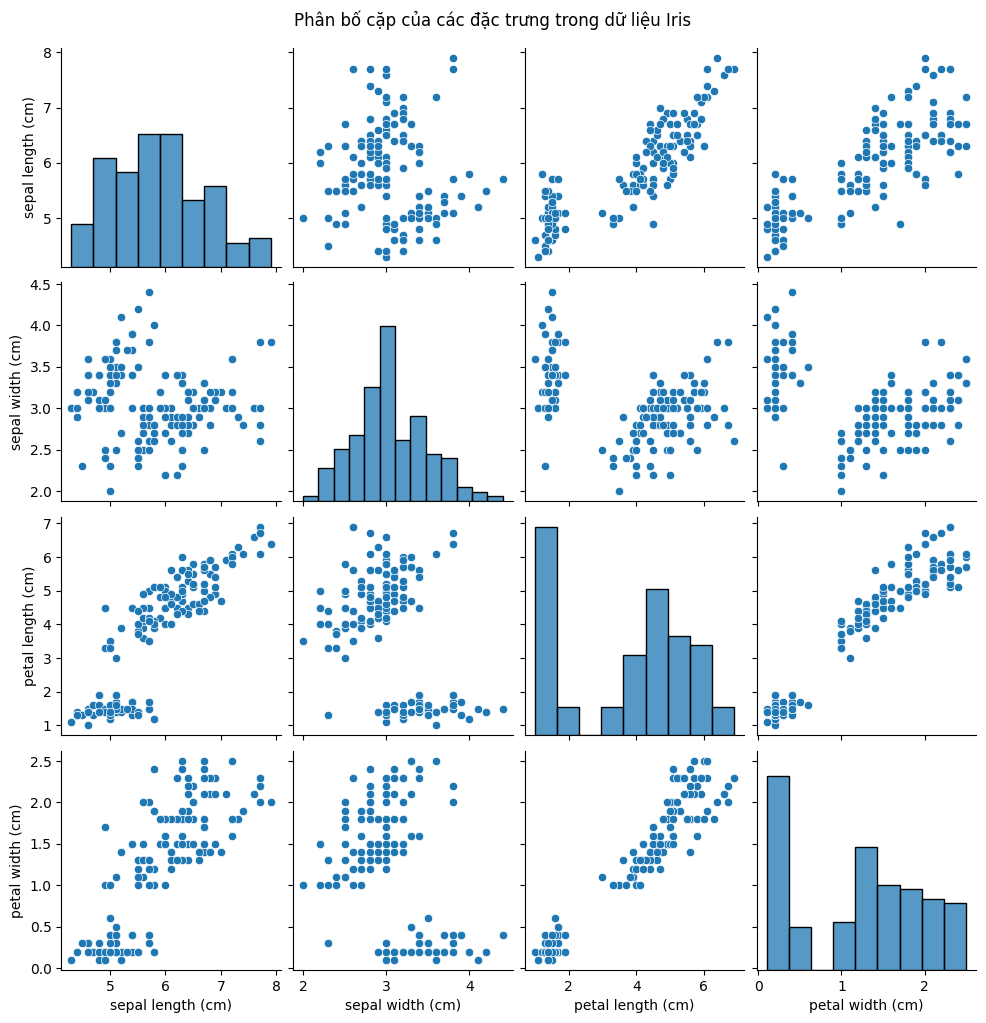


--- Dữ liệu sau khi chuẩn hóa (5 dòng đầu) ---
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [ ]:
## Bài 1.1: Khám phá và Chuẩn bị Dữ liệu Iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 1. Tải và tạo DataFrame
iris = load_iris()
# Bỏ cột 'target' (nhãn thật) để thực hiện học không giám sát
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris_true = iris.target # Giữ lại nhãn thật để so sánh cuối cùng

print("--- 5 dòng đầu của dữ liệu Iris ---")
print(X_iris.head())

# 2. Trực quan hóa dữ liệu để xem cấu trúc
sns.pairplot(X_iris)
plt.suptitle('Phân bố cặp của các đặc trưng trong dữ liệu Iris', y=1.02)
plt.show()

# 3. Chuẩn hóa dữ liệu
# Đây là bước cực kỳ quan trọng cho các thuật toán dựa trên khoảng cách
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

print("\n--- Dữ liệu sau khi chuẩn hóa (5 dòng đầu) ---")
print(X_iris_scaled[:5])

Phân tích: Biểu đồ pairplot cho thấy các cụm hoa có xu hướng tách biệt khá rõ ràng, đặc biệt là khi nhìn vào petal length (cm) và petal width (cm), hứa hẹn các thuật toán gom cụm sẽ hoạt động tốt.

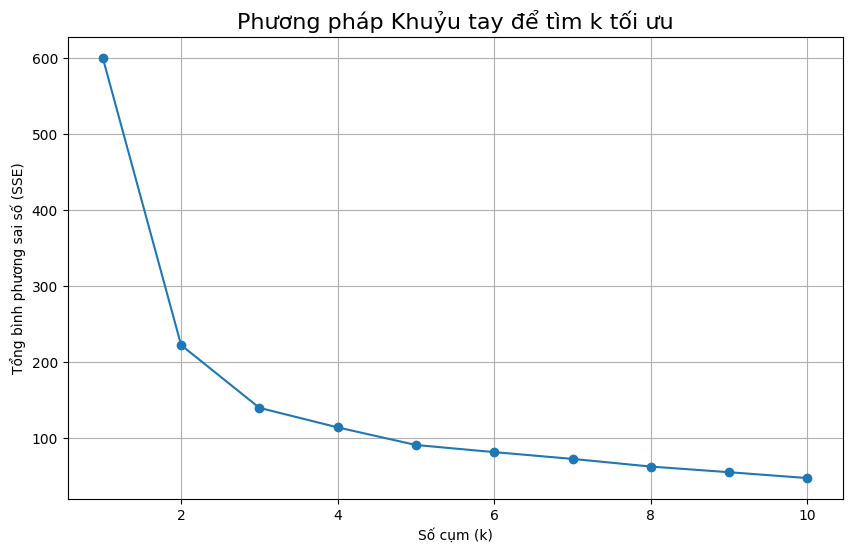

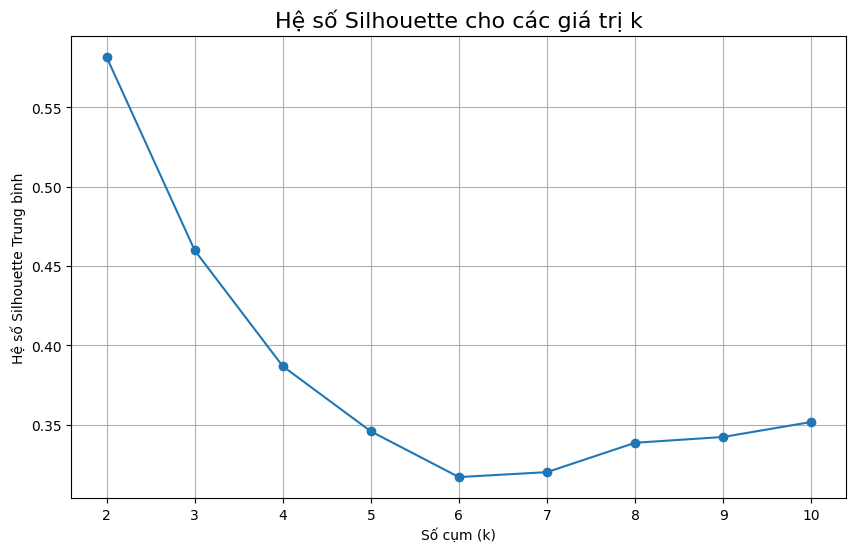

In [ ]:
## Bài 1.2: Áp dụng K-Means và Tìm số cụm tối ưu k
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#--- Phương pháp 1: "Khuỷu tay" (Elbow Method) dựa trên SSE ---
# SSE (Sum of Squared Errors) là tổng bình phương sai số, cũng là hàm mục tiêu của K-Means.
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_iris_scaled)
    sse.append(kmeans.inertia_) # inertia_ chính là giá trị SSE

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Phương pháp Khuỷu tay để tìm k tối ưu', fontsize=16)
plt.xlabel('Số cụm (k)')
plt.ylabel('Tổng bình phương sai số (SSE)')
plt.grid(True)
plt.show()

#--- Phương pháp 2: Hệ số Silhouette ---
# Đo lường mức độ một điểm "phù hợp" với cụm của nó so với các cụm khác. Giá trị càng gần 1 càng tốt.
silhouette_coefficients = []
k_range = range(2, 11) # Silhouette cần ít nhất 2 cụm
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_iris_scaled)
    score = silhouette_score(X_iris_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_coefficients, marker='o')
plt.title('Hệ số Silhouette cho các giá trị k', fontsize=16)
plt.xlabel('Số cụm (k)')
plt.ylabel('Hệ số Silhouette Trung bình')
plt.grid(True)
plt.show()

Phân tích và lựa chọn:

* Phương pháp khuỷu tay: Đồ thị SSE "gập" lại rõ rệt tại k=3. Sau điểm này, việc tăng số cụm không còn mang lại cải thiện đáng kể về SSE.

* Hệ số Silhouette: Đạt giá trị cao nhất tại k=2, và cũng khá cao tại k=3. Kết hợp cả hai phương pháp, k=3 là lựa chọn hợp lý nhất, trùng khớp với số loài hoa thực tế.

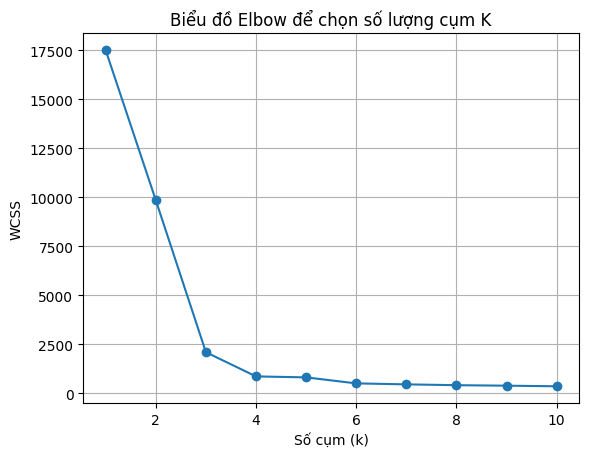

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Tạo dữ liệu giả lập để demo
X, _ = make_blobs(n_samples=300, centers=5, random_state=42)

wcss = []  # Within-Cluster Sum of Squares

# Thử các giá trị k từ 1 đến 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ chính là WCSS

# Vẽ biểu đồ
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Biểu đồ Elbow để chọn số lượng cụm K')
plt.xlabel('Số cụm (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

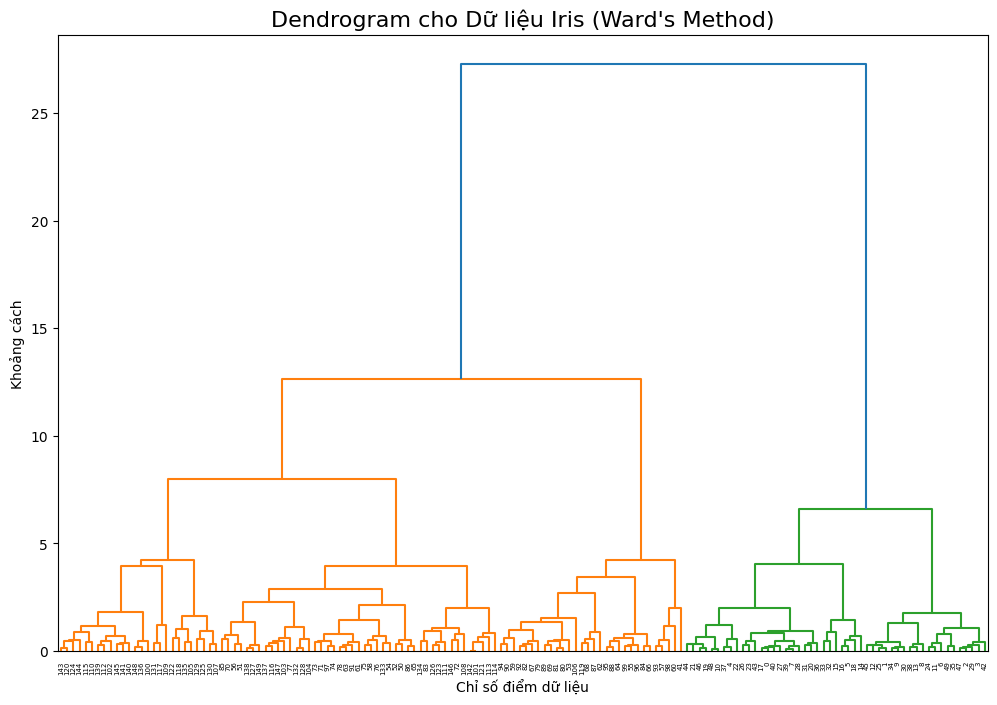

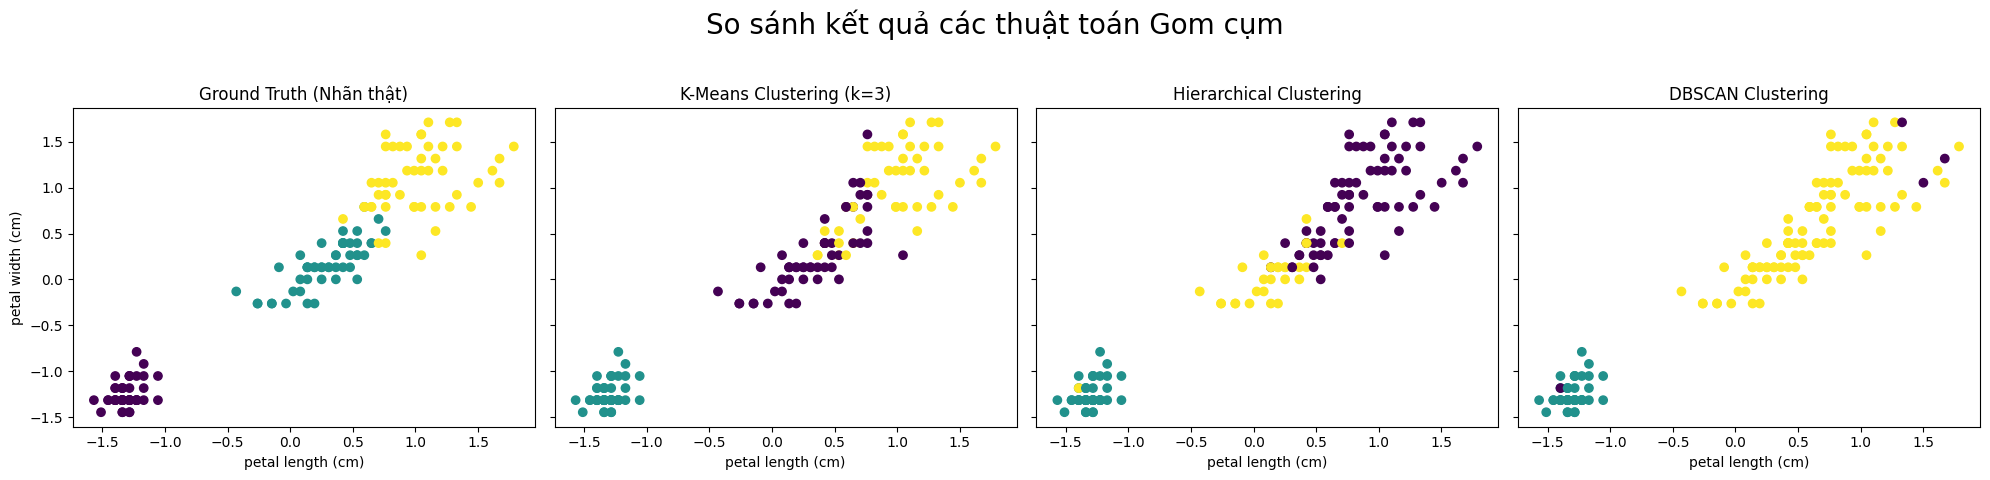

In [ ]:
## Bài 1.3: So sánh các Thuật toán Gom cụm
# Bây giờ, hãy so sánh kết quả của K-Means (với k=3), Gom cụm phân cấp và DBSCAN.
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

#--- Chạy các thuật toán ---
# 1. K-Means (với k=3 đã chọn)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_iris_scaled)

# 2. Gom cụm phân cấp (Hierarchical - Agglomerative)
# Phương pháp 'ward' rất phổ biến và hiệu quả[cite: 550], tối thiểu hóa phương sai trong các cụm.
# Vẽ Dendrogram để khám phá cấu trúc lồng nhau [cite: 472, 473]
linked = linkage(X_iris_scaled, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram cho Dữ liệu Iris (Ward\'s Method)', fontsize=16)
plt.xlabel('Chỉ số điểm dữ liệu')
plt.ylabel('Khoảng cách')
plt.show()

# Cắt dendrogram để lấy 3 cụm
agg_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_agg = agg_cluster.fit_predict(X_iris_scaled)

# 3. DBSCAN
# Thuật toán này không cần chỉ định số cụm [cite: 847], nhưng nhạy cảm với tham số Eps và MinPts[cite: 850].
dbscan = DBSCAN(eps=0.9, min_samples=5) # Các giá trị này được chọn sau vài lần thử nghiệm
y_dbscan = dbscan.fit_predict(X_iris_scaled)


#--- Trực quan hóa và so sánh kết quả ---
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Lấy 2 đặc trưng quan trọng nhất để vẽ (petal length và petal width)
x_axis = 2
y_axis = 3

# Biểu đồ 1: Nhãn thật
axes[0].scatter(X_iris_scaled[:, x_axis], X_iris_scaled[:, y_axis], c=y_iris_true, cmap='viridis')
axes[0].set_title('Ground Truth (Nhãn thật)')
axes[0].set_xlabel(iris.feature_names[x_axis])
axes[0].set_ylabel(iris.feature_names[y_axis])


# Biểu đồ 2: K-Means
axes[1].scatter(X_iris_scaled[:, x_axis], X_iris_scaled[:, y_axis], c=y_kmeans, cmap='viridis')
axes[1].set_title('K-Means Clustering (k=3)')
axes[1].set_xlabel(iris.feature_names[x_axis])


# Biểu đồ 3: Agglomerative
axes[2].scatter(X_iris_scaled[:, x_axis], X_iris_scaled[:, y_axis], c=y_agg, cmap='viridis')
axes[2].set_title('Hierarchical Clustering')
axes[2].set_xlabel(iris.feature_names[x_axis])


# Biểu đồ 4: DBSCAN
axes[3].scatter(X_iris_scaled[:, x_axis], X_iris_scaled[:, y_axis], c=y_dbscan, cmap='viridis')
axes[3].set_title('DBSCAN Clustering')
axes[3].set_xlabel(iris.feature_names[x_axis])


plt.suptitle('So sánh kết quả các thuật toán Gom cụm', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Phân tích so sánh:

* K-Means và Gom cụm phân cấp đều cho kết quả rất tốt, gần như trùng khớp hoàn toàn với nhãn thật. Điều này là do các cụm trong dữ liệu Iris có dạng gần hình cầu và tách biệt tương đối.

* DBSCAN cũng hoạt động tốt nhưng có thể xác định một vài điểm là nhiễu (outlier), đây là một điểm mạnh của thuật toán.

* Dendrogram cho thấy một cái nhìn sâu sắc về cấu trúc phân cấp: hai loài hoa Versicolor và Virginica giống nhau hơn và được gộp lại với nhau trước khi được gộp chung với loài Setosa.

# Phần 2: Ứng dụng Thực tế - Phân tích Dữ liệu điểm thi THPT Quốc gia 2024

Mục tiêu: Khám phá xem liệu có các "cụm" tỉnh thành nào có đặc điểm giáo dục tương đồng hay không, ví dụ: cụm các tỉnh mạnh về Khoa học Tự nhiên, cụm các tỉnh mạnh về Khoa học Xã hội, v.v.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
## Bài 2.1: Chuẩn bị Dữ liệu Điểm thi

# 1. Lọc dữ liệu năm 2024
df_2024 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/df_2024_export.csv')

# 2. Tạo DataFrame đặc trưng cho mỗi tỉnh
# Đặc trưng là điểm trung bình của các môn và các khối thi chính
features_cols = ['Toan', 'Van', 'NN', 'Ly', 'Hoa', 'Sinh', 'Su', 'Dia', 'GDCD', 'KhoiA', 'KhoiD']
province_features = df_2024.groupby('TenTinh')[features_cols].mean().round(2)

print("--- Đặc trưng điểm thi của các tỉnh (5 tỉnh đầu tiên) ---")
print(province_features.head())

--- Đặc trưng điểm thi của các tỉnh (5 tỉnh đầu tiên) ---
                   Toan   Van    NN    Ly   Hoa  Sinh    Su   Dia  GDCD  \
TenTinh                                                                   
An Giang           6.47  7.65  5.05  2.46  2.48  2.42  4.39  4.82  4.69   
Bà Rịa - Vũng Tàu  6.82  7.35  5.64  3.44  3.38  3.24  3.07  3.39  3.27   
Bình Dương         7.04  7.37  5.38  3.46  3.51  3.29  3.55  3.87  2.99   
Bình Phước         6.34  6.69  4.89  2.50  2.46  2.32  4.14  4.60  4.62   
Bình Thuận         6.26  6.83  4.87  2.10  2.11  1.99  4.40  4.79  5.03   

                   KhoiA  KhoiD  
TenTinh                          
An Giang           11.41  19.17  
Bà Rịa - Vũng Tàu  13.64  19.80  
Bình Dương         14.01  19.79  
Bình Phước         11.30  17.92  
Bình Thuận         10.46  17.96  


In [ ]:
from sklearn.preprocessing import StandardScaler
# 3. Chuẩn hóa dữ liệu
scaler_province = StandardScaler()
province_features_scaled = scaler_province.fit_transform(province_features)

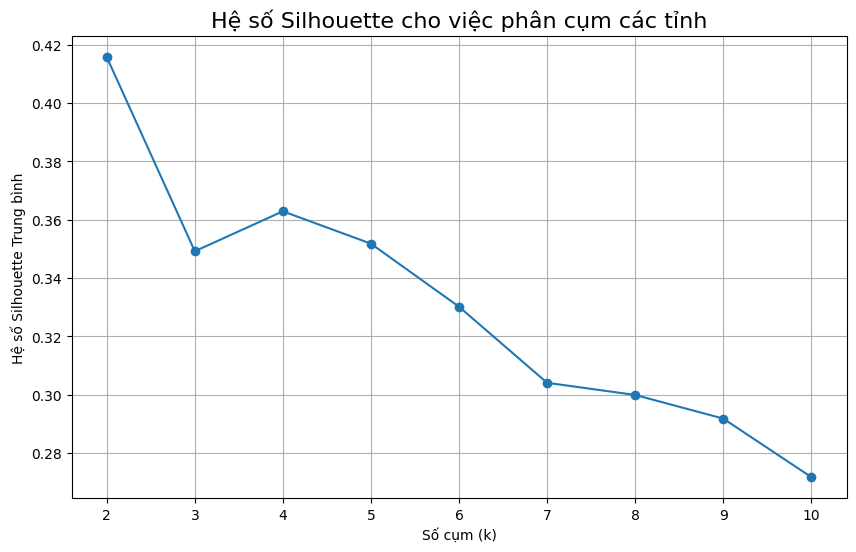


--- Phân tích đặc điểm trung bình của 4 cụm tỉnh/thành ---
             Toan       Van        NN        Ly       Hoa      Sinh        Su  \
Cluster                                                                         
0        6.168333  6.662917  4.602083  2.191250  2.242917  2.082500  4.193750   
1        5.203636  6.501818  3.810000  0.810000  0.818182  0.752727  5.585455   
2        6.361053  7.671053  4.613684  1.828947  1.822632  1.692632  4.882632   
3        6.755556  7.163333  5.141111  3.161111  3.196667  2.974444  3.416667   

              Dia      GDCD      KhoiA      KhoiD  
Cluster                                            
0        4.594583  4.549167  10.601250  17.434167  
1        6.088182  5.749091   6.830000  15.514545  
2        5.343158  4.915789  10.010000  18.646316  
3        3.774444  3.402222  13.111111  19.056667  

--- Danh sách các tỉnh trong từng cụm ---

Cụm 0:
Bình Phước, Bình Thuận, Bình Định, Bạc Liêu, Bến Tre, Cà Mau, Cần Thơ, Gia Lai, Hưng Yên, 

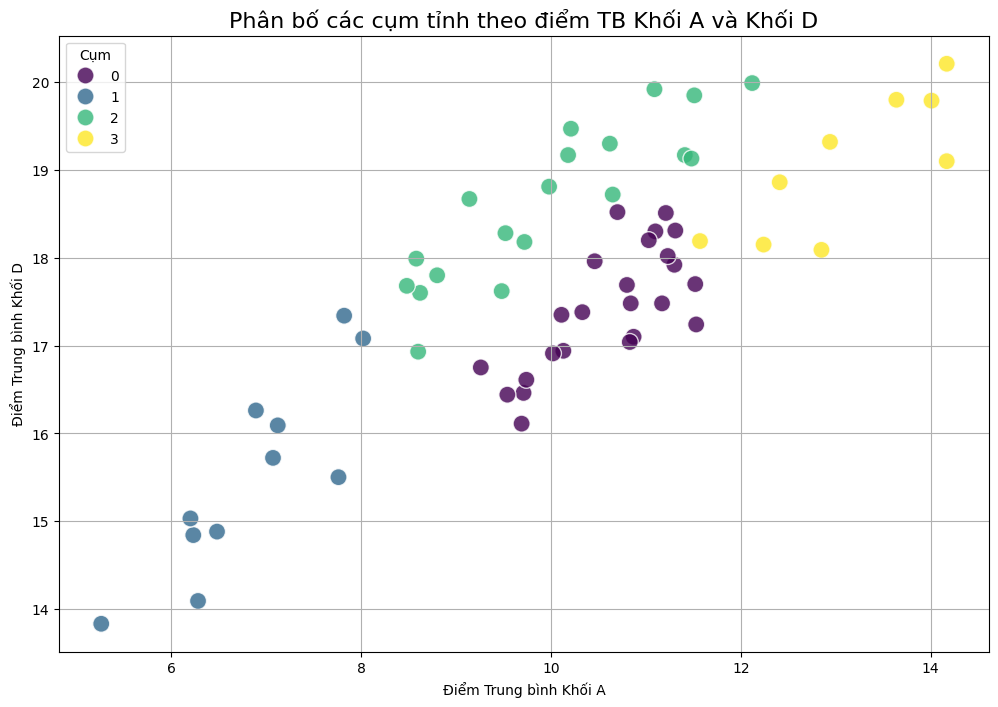

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
## Bài 2.2: Phân cụm các Tỉnh/Thành và Diễn giải Kết quả
# Chúng ta sẽ sử dụng K-Means vì nó đơn giản và hiệu quả. Trước hết, cần tìm số cụm k tối ưu.
# 1. Tìm k tối ưu bằng phương pháp Silhouette
silhouette_coefficients_province = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(province_features_scaled)
    score = silhouette_score(province_features_scaled, kmeans.labels_)
    silhouette_coefficients_province.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_coefficients_province, marker='o')
plt.title('Hệ số Silhouette cho việc phân cụm các tỉnh', fontsize=16)
plt.xlabel('Số cụm (k)')
plt.ylabel('Hệ số Silhouette Trung bình')
plt.grid(True)
plt.show()

# Giả sử k=4 là một lựa chọn tốt từ biểu đồ
k_optimal = 4

# 2. Chạy K-Means với k tối ưu
kmeans_province = KMeans(n_clusters=k_optimal, n_init=10, random_state=42)
province_features['Cluster'] = kmeans_province.fit_predict(province_features_scaled)

# 3. Phân tích và diễn giải các cụm
print(f"\n--- Phân tích đặc điểm trung bình của {k_optimal} cụm tỉnh/thành ---")
cluster_analysis = province_features.groupby('Cluster')[features_cols].mean()
print(cluster_analysis)

# 4. In ra danh sách các tỉnh trong từng cụm
print("\n--- Danh sách các tỉnh trong từng cụm ---")
for i in range(k_optimal):
    provinces_in_cluster = province_features[province_features['Cluster'] == i].index.tolist()
    print(f"\nCụm {i}:")
    print(", ".join(provinces_in_cluster))

# 5. Trực quan hóa các cụm (ví dụ trên biểu đồ điểm Khối A vs Khối D)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=province_features,
    x='KhoiA',
    y='KhoiD',
    hue='Cluster',
    palette='viridis',
    s=150, # Kích thước điểm
    alpha=0.8
)
plt.title('Phân bố các cụm tỉnh theo điểm TB Khối A và Khối D', fontsize=16)
plt.xlabel('Điểm Trung bình Khối A')
plt.ylabel('Điểm Trung bình Khối D')
plt.legend(title='Cụm')
plt.grid(True)
plt.show()

Hướng dẫn Diễn giải Kết quả:
Sau khi chạy code, em sẽ nhận được một bảng phân tích đặc điểm trung bình của 4 cụm. Hãy nhìn vào bảng đó và trả lời các câu hỏi:

* Cụm nào có điểm Khối A (Toán, Lý, Hóa) cao nhất? => Đây có thể là "Cụm tỉnh mạnh về Khoa học Tự nhiên".

* Cụm nào có điểm Khối D (Toán, Văn, Anh) và môn Ngoại ngữ (NN) vượt trội? => Đây có thể là "Cụm các thành phố lớn và vùng kinh tế phát triển".

* Cụm nào có điểm các môn Sử, Địa, GDCD cao hơn hẳn? => "Cụm tỉnh mạnh về Khoa học Xã hội".

* Cụm nào có điểm số thấp đều ở các môn? => "Cụm các tỉnh thuộc vùng khó khăn, cần được đầu tư hơn".

Việc đặt tên và diễn giải ý nghĩa cho từng cụm chính là bước quan trọng nhất, biến những con số từ thuật toán thành những hiểu biết thực tế và có giá trị.